<a href="https://colab.research.google.com/github/zombig816/Numerical-methods/blob/main/num_methods%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

72.32162725149941 0
71.61182810838882 1
36.639880543772676 2
26.528346683882734 3
21.472224903451675 4
18.384489255624615 5
16.282549972234804 6
14.749089702270666 7
13.574886621322754 8
12.642889421784863 9
11.882266612085555 10
11.247543242784646 11
10.708139592143835 12
10.242710602057159 13
9.835892123200885 14
9.47633620973792 15
9.155475187965664 16
8.866716784583446 17
8.604904185588492 18
8.365944379976911 19
8.14654650747639 20
7.944033946480324 21
7.7562069470565795 22
7.581240605506429 23
7.41760799490479 24
7.264021492364775 25
7.119387462870696 26
6.982770878536765 27
6.853367419219466 28
6.730481270153948 29
6.613507303007645 30
6.501916662111904 31
6.395245019586544 32
6.293082939675122 33
6.195067922916852 34
6.1008777979024655 35
6.010225201436952 36
5.922852943401373 37
5.838530095061976 38
5.757048672325592 39
5.678220810890443 40
5.601876350155767 41
5.527860758440342 42
5.456033344491387 43
5.386265710177885 44
5.318440407208369 45
5.252449767118733 46
5.1881948789

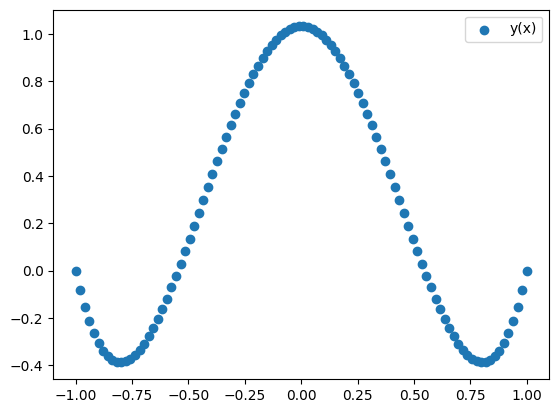

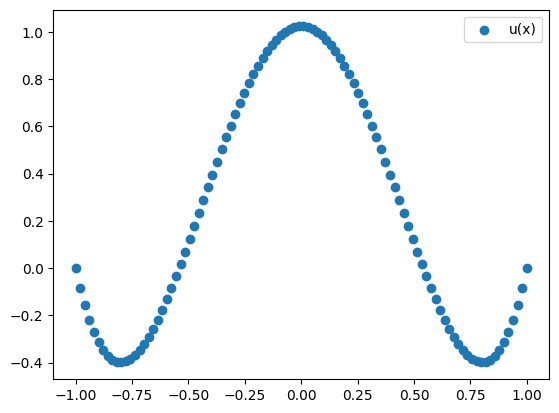

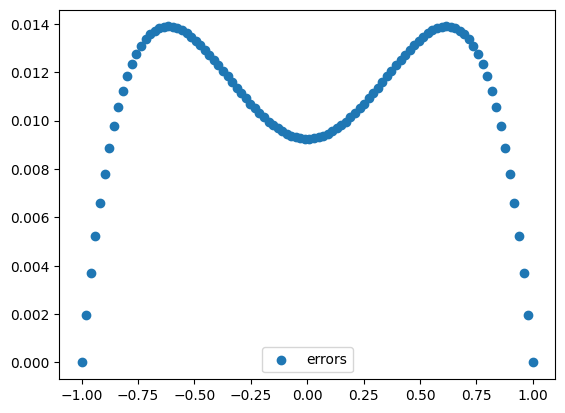

In [24]:
import numpy as np
import matplotlib.pyplot as plt


def f(x, eps = 0.05):
  return ((1/eps) + np.pi**2) * np.cos(np.pi * x)

def q(x, eps = 0.05):
  return 1/eps

def u_x(x, eps = 0.05):
  return (np.cos(np.pi * x)
   + np.exp((x - 1.0)/(eps**0.5))
    + np.exp(-(x + 1.0)/(eps**0.5)))


def getMatrix(h, arr):
    n = len(arr)
    q_values = [q(i) for i in arr]

    a_values = []
    b_values = []
    c_values = []
    a_values.append(0.0)
    b_values.append(0.0)
    c_values.append(1.0)
    for i in range(1, n - 1):
        a_values.append(-1 / h ** 2)
        b_values.append(-1 / h ** 2)
        c_values.append((2 / h ** 2) + q_values[i])
    a_values.append(0.0)
    c_values.append(1.0)
    b_values.append(0.0)
    matrix = np.zeros((n, n))
    for i in range(n):
        if i == 0:
            matrix[i][i + 1] = b_values[i]
            matrix[i][i] = c_values[i]
        elif i == n - 1:
            matrix[i][i - 1] = a_values[i]
            matrix[i][i] = c_values[i]
        else:
            matrix[i][i - 1] = a_values[i]
            matrix[i][i + 1] = b_values[i]
            matrix[i][i] = c_values[i]
    return matrix.copy()

def check_res(matr, x, h, f_values,eps, counter):
    s = 0.0
    A = np.matmul(matr, x)
    for i in range(len(f_values)):
        s += (A[i] - f_values[i]) ** 2
    print(((h ** 2) * s) ** 0.5 , counter)
    return ((h ** 2) * s) ** 0.5 < eps


def jacobi(n, b, A, eps):
    h = (2.0)/n
    x = np.zeros(len(b))
    x_pred = np.zeros(len(b))
    x[:] = 1
    x_pred[:] = 1
    x[0] = u_x(-1)
    x[-1] = u_x(1)

    counter = 0
    while not check_res(A, x, h, b, eps, counter):
        counter += 1
        x[0] = (-1 * x_pred[1] * A[0][1] + b[0])/A[0][0]

        for i in range(1, n-1):
            x[i] = (-1* x_pred[i-1] * A[i][i-1] - x_pred[i+1]* A[i][i-1] + b[i])/A[i][i]

        x[n-1] = (-1* x_pred[n-2] * A[n-1][n-2] + b[n-1])/A[n-1][n-1]

        x_pred = x.copy()

    return x

def relax(n, matr, f_values, mu, eps):
    h = 2.0/n
    x = np.zeros(n)
    counter = 0
    while not check_res(matr, x, h, f_values, eps, counter):
        counter+=1
        x_new = np.copy(x)
        for i in range(n):
            s1 = sum(matr[i][j] * x_new[j] for j in range(i))
            s2 = sum(matr[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (1-mu)*x[i]+mu*(f_values[i] - s1 - s2) / matr[i][i]
        for i in range(n):
            x[i] = x_new[i]
    return x

n = 100
h = 2.0 / n
arr = np.linspace(-1.0, 1.0, n)
A = getMatrix(h, arr.copy())
b = [f(x) for x in arr]
b[0] = u_x(-1.0)
b[n - 1] = u_x(1.0)

ux = u_x(arr)

y = jacobi(n, b, A, 0.05)
#y = relax(n, A, b, 0.7, 0.05)

fig, ax = plt.subplots()
ax.scatter(arr, y, label='y(x)')
plt.legend()
fig2, ax2 = plt.subplots()
ax2.scatter(arr, ux, label='u(x)')
plt.legend()
fig3, ax3 = plt.subplots()
ax3.scatter(arr, abs(ux-y), label='errors')
plt.legend()

plt.show()